In [ ]:
#Import matplotlib and set defaults
from matplotlib import rcParams 
from matplotlib import pyplot as plt

rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

## Loading  Steinmetz data

includes some visualizations

In [ ]:
#Data retrieval
import os, requests

fname = []
for j in range(3):
  fname.append('steinmetz_part%d.npz'%j)

fname.append('steinmetz_st.npz')

url = []
url = ["https://osf.io/agvxh/download"]
url.append("https://osf.io/uv3mw/download")
url.append("https://osf.io/ehmw2/download")
url.append("https://osf.io/4bjns/download")


for j in range(len(url)):
  if not os.path.isfile(fname[j]):
    try:
      r = requests.get(url[j])
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
    else:
      if r.status_code != requests.codes.ok:
        print("!!! Failed to download data !!!")
      else:
        with open(fname[j], "wb") as fid:
          fid.write(r.content)


In [ ]:
# Data loading
import numpy as np

alldat = np.array([])
for j in fname[0:3]:
  alldat = np.hstack((alldat, np.load(j, allow_pickle=True)['dat']))

#dat_ST = np.load('steinmetz_st.npz', allow_pickle=True)['dat']

`alldat` contains 39 sessions from 10 mice, data from Steinmetz et al, 2019. Time bins for all measurements are 10ms, starting 500ms before stimulus onset. The mouse had to determine which side has the highest contrast. For each `dat = alldat[k]`, you have the fields below. For extra variables, check out the extra notebook and extra data files (lfp, waveforms and exact spike times, non-binned). 

* `dat['mouse_name']`: mouse name
* `dat['date_exp']`: when a session was performed
* `dat['spks']`: neurons by trials by time bins.    
* `dat['brain_area']`: brain area for each neuron recorded. 
* `dat['ccf']`: Allen Institute brain atlas coordinates for each neuron. 
* `dat['ccf_axes']`: axes names for the Allen CCF. 
* `dat['contrast_right']`: contrast level for the right stimulus, which is always contralateral to the recorded brain areas.
* `dat['contrast_left']`: contrast level for left stimulus. 
* `dat['gocue']`: when the go cue sound was played. 
* `dat['response_times']`: when the response was registered, which has to be after the go cue. The mouse can turn the wheel before the go cue (and nearly always does!), but the stimulus on the screen won't move before the go cue.  
* `dat['response']`: which side the response was (`-1`, `0`, `1`). When the right-side stimulus had higher contrast, the correct choice was `-1`. `0` is a no go response. 
* `dat['feedback_time']`: when feedback was provided. 
* `dat['feedback_type']`: if the feedback was positive (`+1`, reward) or negative (`-1`, white noise burst).  
* `dat['wheel']`: turning speed of the wheel that the mice uses to make a response, sampled at `10ms`. 
* `dat['pupil']`: pupil area  (noisy, because pupil is very small) + pupil horizontal and vertical position.
* `dat['face']`: average face motion energy from a video camera. 
* `dat['licks']`: lick detections, 0 or 1.   
* `dat['trough_to_peak']`: measures the width of the action potential waveform for each neuron. Widths `<=10` samples are "putative fast spiking neurons". 
* `dat['%X%_passive']`: same as above for `X` = {`spks`, `pupil`, `wheel`, `contrast_left`, `contrast_right`} but for  passive trials at the end of the recording when the mouse was no longer engaged and stopped making responses. 
* `dat['prev_reward']`: time of the feedback (reward/white noise) on the previous trial in relation to the current stimulus time. 
* `dat['reaction_time']`: ntrials by 2. First column: reaction time computed from the wheel movement as the first sample above `5` ticks/10ms bin. Second column: direction of the wheel movement (`0` = no move detected).  




In [ ]:
#Make a plot of which brain areas are present in each dataset
regions = ["vis ctx", "thal", "hipp", "other ctx", "midbrain", "basal ganglia", "cortical subplate", "other"]
region_colors = ['blue', 'red', 'green', 'darkblue', 'violet', 'lightblue', 'orange', 'gray']
brain_groups = [["VISa", "VISam", "VISl", "VISp", "VISpm", "VISrl"], # visual cortex
                ["CL", "LD", "LGd", "LH", "LP", "MD", "MG", "PO", "POL", "PT", "RT", "SPF", "TH", "VAL", "VPL", "VPM"], # thalamus
                ["CA", "CA1", "CA2", "CA3", "DG", "SUB", "POST"], # hippocampal
                ["ACA", "AUD", "COA", "DP", "ILA", "MOp", "MOs", "OLF", "ORB", "ORBm", "PIR", "PL", "SSp", "SSs", "RSP","TT"], # non-visual cortex
                ["APN", "IC", "MB", "MRN", "NB", "PAG", "RN", "SCs", "SCm", "SCig", "SCsg", "ZI"], # midbrain
                ["ACB", "CP", "GPe", "LS", "LSc", "LSr", "MS", "OT", "SNr", "SI"], # basal ganglia 
                ["BLA", "BMA", "EP", "EPd", "MEA"] # cortical subplate
                ]

In [ ]:
# Getting spikes for one session in vis_ctx
vis_ctx_spikes = []
brain_area_data = []
contrast_right = []
contrast_left = []
response_times = []
reaction_times = []
#vis_ctx_spike_time = []
for i in range(39):
  dat = alldat[i]
  region = brain_groups[0] # vis_ctx
  index_vis = [ind for ind , j in enumerate(dat['brain_area']) if j == 'VISp']
  brain_area_data.append(index_vis)
  contrast_right.append(dat['contrast_right'])
  contrast_left.append(dat['contrast_left'])
  response_times.append(dat['response_time'])
  
  print(dat['spks'].shape)
  vis_ctx_spikes.append(dat['spks'][index_vis])
  #vis_ctx_spike_time.append(dat_ST[i]['ss'][index_vis])

(734, 214, 250)
(1070, 251, 250)
(619, 228, 250)
(1769, 249, 250)
(1077, 254, 250)
(1169, 290, 250)
(584, 252, 250)
(1156, 250, 250)
(788, 372, 250)
(1172, 447, 250)
(857, 342, 250)
(698, 340, 250)
(983, 300, 250)
(756, 268, 250)
(743, 404, 250)
(474, 280, 250)
(565, 224, 250)
(1089, 316, 250)
(606, 247, 250)
(899, 235, 250)
(578, 124, 250)
(646, 444, 250)
(1268, 151, 250)
(1337, 187, 250)
(885, 261, 250)
(1056, 178, 250)
(563, 253, 250)
(549, 142, 250)
(750, 128, 250)
(942, 143, 250)
(977, 237, 250)
(522, 260, 250)
(613, 191, 250)
(781, 296, 250)
(795, 311, 250)
(680, 258, 250)
(1055, 181, 250)
(805, 199, 250)
(1348, 343, 250)


In [ ]:
# Getting spikes for one session in vis_ctx
pic_left_spikes = []
pic_right_spikes = []
contrast_right = []
contrast_left = []
response_side = []
sessions  = []
pupil_area = []
for i in range(39):
  dat = alldat[i]
  index_vis = [ind for ind , j in enumerate(dat['brain_area']) if j == "VISp"]
  vis_left = dat['contrast_left']
  vis_right = dat['contrast_right']
  
  left_cont_trials = np.where(np.logical_and(vis_left>0, vis_right==0) == True)[0]
  right_cont_trials = np.where(np.logical_and(vis_left==0, vis_right>0) == True)[0]
  if dat['spks'][index_vis].shape[0] != 0 :
      sessions.append(i) 
      pupil_area.append(dat['pupil'])
      f_neurons = dat['spks'][index_vis]
      fl_trials = f_neurons[: , left_cont_trials , : ]
      fl_trials = np.transpose(fl_trials , (1 , 0 , 2))
      pic_left_spikes.append(fl_trials.reshape(fl_trials.shape[0] , -1)) 
        
      fr_trials = f_neurons[: , right_cont_trials , :]
      fr_trials = np.transpose(fr_trials, (1 , 0 , 2))
      pic_right_spikes.append(fr_trials.reshape(fr_trials.shape[0] , -1))

      reaction_times.append(dat['reaction_time'])



In [ ]:
# Execute this to get relevant data


vis_ctx_spikes = []
brain_area_data = []
reaction_times = []
sessions = []

for i in range(39):
  dat = alldat[i]
  index_vis = [ind for ind , j in enumerate(dat['brain_area']) if j == "VISp"]
  vis_ctx_spikes.append(dat['spks'][index_vis])
  reaction_times.append(dat['reaction_time'])
  if dat['spks'][index_vis].shape[0] != 0 :
      sessions.append(i) 


Orig_data  = neurons X trials X timebins (250) 


New_data = neurons X trials , timebins (25)

PCA matrix = neurons X (trials X timebins) 

Model fit to : .transpose  ->  (trials x timebins ) x neurons

Scores  : samples x components -> (trials x timebins) x components (5)

Neuron_mean : PCA matrix averaged across neurons -> (trial x timebins)






Principle Component Analysis

In [ ]:
# PCA for one session 

from sklearn.decomposition import PCA

session = sessions[3]  # Get a session where VISpm neurons were recorded
dat = vis_ctx_spikes[session]   # Get spikes from that session
new_dat = np.reshape(dat, (48, 250, 10, 25), order='F')
new_dat = np.mean(new_dat , axis = 2)
NN = dat.shape[0]
PCA_matrix = np.reshape(new_dat , (NN , -1))  # Input matrix shape -  (neurons X (trials and timebins multiplied))

#PCA_matrix = PCA_matrix - np.mean(PCA_matrix , axis =1)[: , np.newaxis] # subtract mean

model = PCA(n_components = 5).fit(PCA_matrix.T)
W = model.components_

pc =  W @ np.reshape(new_dat , (NN , -1))
#pc = np.reshape(pc , (5 , -1 , 250))

scores = model.transform(PCA_matrix.T)

In [ ]:
# PCA for one session : TO correlate with reaction time without averaging

from sklearn.decomposition import PCA

session = sessions[3]  # Get a session where VISpm neurons were recorded
dat = vis_ctx_spikes[session]   # Get spikes from that session  
print(dat.shape)
new_dat = np.transpose(dat , (1 , 0 , 2))
print(new_dat.shape)
#new_dat = np.mean(new_dat , axis = 2)
#print(new_dat.shape)
n_tr = new_dat.shape[0]
PCA_matrix = np.reshape(new_dat , (n_tr , -1)) # trials X (neurons x timebins)

#PCA_matrix = PCA_matrix - np.mean(PCA_matrix , axis =1)[: , np.newaxis] # subtract mean
print(PCA_matrix.shape)
model = PCA(n_components = 5).fit(PCA_matrix)
#W = model.components_

#pc =  W @ np.reshape(new_dat , (NN , -1))
#pc = np.reshape(pc , (5 , -1 , 250))

scores_without_avg = model.transform(PCA_matrix)
print(scores_without_avg.shape)

(48, 250, 250)
(250, 48, 250)
(250, 12000)
(250, 5)


In [ ]:
# PCA for one session : TO correlate with reaction time with averaging to eliminate the neuron axis

from sklearn.decomposition import PCA

session = sessions[3]  # Get a session where VISpm neurons were recorded
dat = vis_ctx_spikes[session]   # Get spikes from that session
new_dat = np.transpose(dat , (1 , 0 , 2))
print(new_dat.shape)
new_dat = np.mean(new_dat , axis = 1)
print(new_dat.shape)
n_tr = new_dat.shape[0]
PCA_matrix = np.reshape(new_dat , (n_tr , -1)) # trials X (neurons x timebins)

#PCA_matrix = PCA_matrix - np.mean(PCA_matrix , axis =1)[: , np.newaxis] # subtract mean

model = PCA(n_components = 5).fit(PCA_matrix)
#W = model.components_

#pc =  W @ np.reshape(new_dat , (NN , -1))
#pc = np.reshape(pc , (5 , -1 , 250))

scores_with_avg = model.transform(PCA_matrix)

(250, 48, 250)
(250, 250)


In [ ]:
# PCA for one session : TO correlate with Neurons X (time bins X trials) (long matrix)

from sklearn.decomposition import PCA

session = sessions[0]  # Get a session where VISp neurons were recorded
reaction_time = reaction_times[session][: , 0]
dat = vis_ctx_spikes[session]   # Get spikes from that session
ntr = dat.shape[1]
neuron = dat.shape[0]
new_dat = np.reshape(dat, (neuron , ntr, 10, 25), order='F')
new_dat = np.mean(new_dat , axis = 2)
ntr = dat.shape[1]
neuron = dat.shape[0]

dat = new_dat[: , : , 0:21]
PCA_matrix = np.reshape( dat , (neuron , -1) , order = 'F') #  neuron x  (trials X timebins)

#PCA_matrix = PCA_matrix - np.mean(PCA_matrix , axis =1)[: , np.newaxis] # subtract mean

model = PCA(n_components = neuron).fit(PCA_matrix.T)
#W = model.components_

#pc =  W @ np.reshape(new_dat , (NN , -1))
#pc = np.reshape(pc , (5 , -1 , 250))

long_scores = model.transform(PCA_matrix.T)

reshape_scores = np.reshape(long_scores[: , 0:61] , (ntr , -1) , order = 'F')
reshape_scores.shape

(214, 1281)

In [ ]:
PCA_matrix.shape , long_scores.shape , reshape_scores.shape , dat.shape

((178, 4494), (4494, 178), (214, 42), (178, 214, 21))

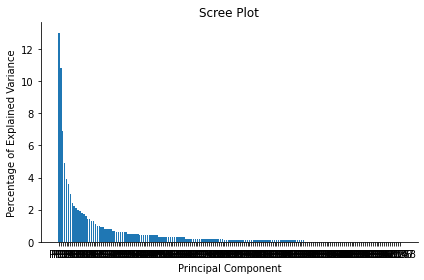

In [ ]:
#Scree plot

per_var = np.round(model.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot') 
plt.show()

Text(0, 0.5, 'Explained variance(%)')

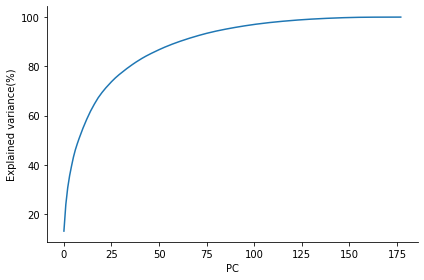

In [ ]:
# Explained Variance
plt.plot(np.cumsum(model.explained_variance_ratio_* 100))

plt.xlabel("PC")
plt.ylabel("Explained variance(%)")


In [ ]:
# Linear regression with PCA scores
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

combined_arr = np.hstack((reshape_scores , np.atleast_2d(reaction_time).T))
combined = pd.DataFrame(combined_arr)
combined.replace([np.inf, -np.inf], np.nan, inplace=True) #time bins 
combined.dropna(axis=0, inplace=True) 
combined = np.asarray(combined)
X = combined[: , 0:1281]
y = combined[: , -1]

MSE_all = []
  
for i in range(10):

  index = np.arange(0,len(y))
  random_index_train = np.random.choice(index, 100, replace = False)
  index_train = np.isin(index, random_index_train)
  index_test = index_train == False

  
#training set /test set
  X_array = np.array(X)
  X_train = np.array(X_array[index_train,:])          #manually choose the size of train and test data
  X_test = np.array(X_array[index_train,:])

  y_array = np.array(y)
  y_train = np.array(y_array[index_train])  
  y_test = np.array(y_array[index_train])



  regr = linear_model.LinearRegression()
  
#training
  regr.fit(X_train, y_train)
  
#predict
  y_pred = regr.predict(X_test)

  MSE = np.mean((y_pred-y_test)**2)
  MSE_all.append(MSE)


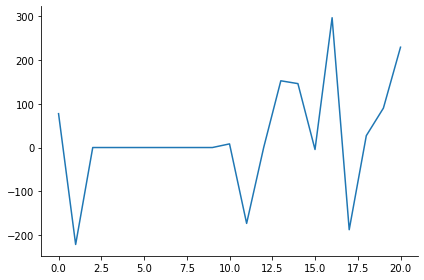

In [ ]:
plt.plot(regr.coef_)

In [ ]:
reaction_time

In [1]:
plt.hist(y_train)

NameError: ignored

Text(0, 0.5, 'MSE')

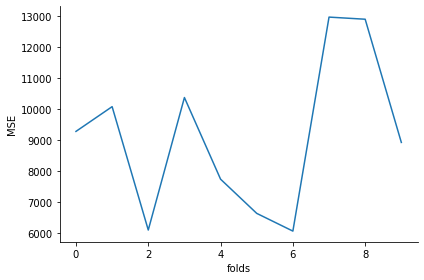

In [ ]:
plt.plot(MSE_all)
plt.xlabel('folds')
plt.ylabel('MSE')

Text(0.5, 1.0, '60 PCs')

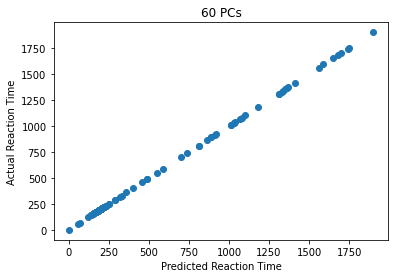

In [ ]:
plt.scatter(y_pred , y_test)
plt.xlabel('Predicted Reaction Time')
plt.ylabel('Actual Reaction Time')
plt.title('60 PCs')

In [ ]:
var_cumsum = np.cumsum(model.explained_variance_ratio_* 100)
ind = np.where(var_cumsum >= 90)[0]
print(ind)

[ 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150
 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168
 169 170 171 172 173 174 175 176 177]


In [ ]:
# Get reaction time for that session
reaction_time = alldat[session]['reaction_time'][: , 0]
#inf_removed_rt= reaction_time[reaction_time != np.inf]
#inf_removed_scores_wo_avg = scores_without_avg[np.where(reaction_time != np.inf)]
#inf_removed_scores_w_avg = scores_with_avg[np.where(reaction_time != np.inf)]

#binned_rt = np.histogram(inf_removed_rt , 20)

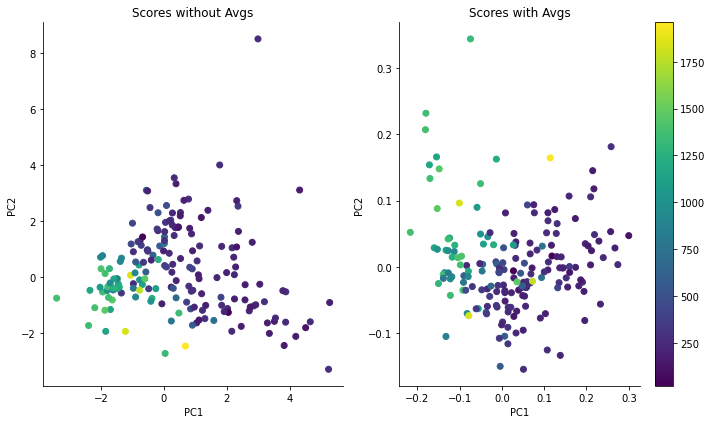

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2 ,  figsize=(10 , 6))

im = ax1.scatter(scores_without_avg[: , 0] , scores_without_avg[: , 1] , c = reaction_time)
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_title('Scores without Avgs')


ax2.scatter(scores_with_avg[: , 0] , scores_with_avg[: , 1] , c = reaction_time)
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_title('Scores with Avgs')

plt.colorbar(im )








In [ ]:
#plt.scatter(inf_removed_scores_w_avg[ : , 0], inf_removed_scores_w_avg[: , 1] , c = inf_removed_rt)
#plt.scatter(scores_without_avg[ : , 0], scores_without_avg[: , 1] , c = reaction_time)
plt.scatter(long_scores[: , 0] , long_scores[: , 1] , c = reaction_time)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()

In [ ]:
scores_without_avg.shape

(250, 5)

Text(0, 0.5, 'Reaction time')

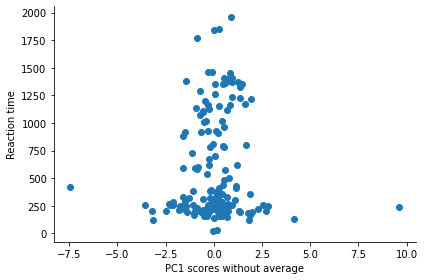

In [ ]:
plt.scatter(scores_without_avg[: ,3] , reaction_time)
plt.xlabel('PC1 scores without average')
plt.ylabel('Reaction time')
#plt.colorbar()


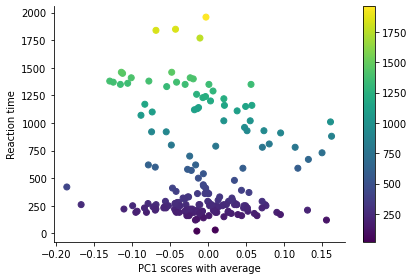

In [ ]:
plt.scatter(scores_with_avg[: ,3 ] , reaction_time , c = reaction_time)
plt.xlabel('PC1 scores with average')
plt.ylabel('Reaction time')
plt.colorbar()


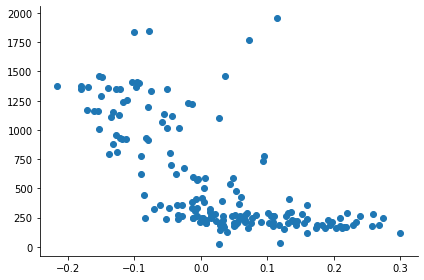

In [ ]:

plt.scatter(scores_with_avg[: , 0] , reaction_time)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


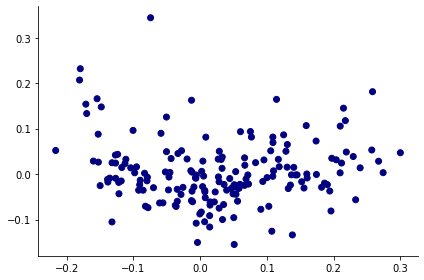

In [ ]:
plt.scatter(scores_with_avg[:,0], scores_with_avg[:,1], c = plt.cm.jet(reaction_time / np.max(reaction_time)))

In [ ]:
pc = np.reshape(scores.T , (5 , -1 , 250))

In [ ]:
#plt.scatter(scores[:,0], scores[:,1], c = plt.cm.jet(neuron_mean/np.max(neuron_mean)))
plt.scatter(scores[:,0], scores[:,1], c = plt.cm.jet(neuron_mean))

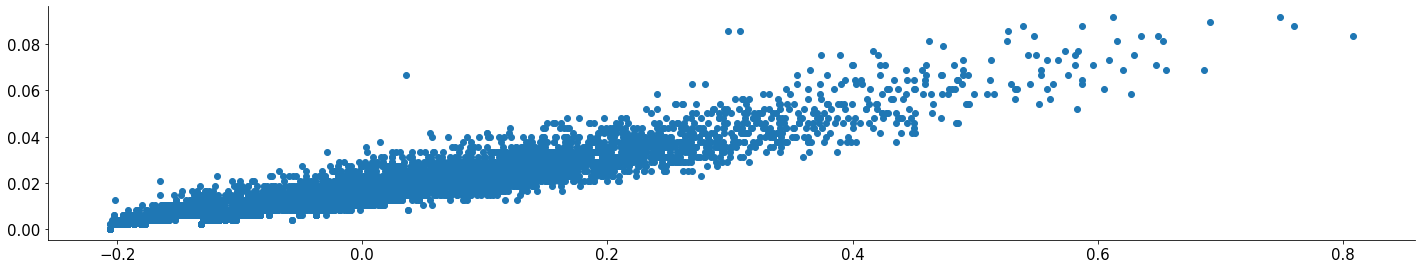

In [ ]:
neuron_mean = np.mean(PCA_matrix , axis = 0)

plt.scatter(scores[: , 0] , neuron_mean)


In [ ]:
neuron_mea.shape


(6250, 5)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (20, 6))

vis_left = alldat[session]['contrast_left']
vis_right = alldat[session]['contrast_right']

for j in range(len(pc)):
  ax = plt.subplot(2,len(pc)+1,j+1)
  pc1 = pc[j]

  # Plot mean firing rate across trials for neurons separated by conditions
  plt.plot(pc1[np.logical_and(vis_left==0, vis_right>0), :].mean(axis=0))  
  plt.plot(pc1[np.logical_and(vis_left>0, vis_right==0), :].mean(axis=0))
  plt.plot(pc1[np.logical_and(vis_left==0, vis_right==0), :].mean(axis=0))
  plt.plot(pc1[np.logical_and(vis_left>0, vis_right>0), :].mean(axis=0))
   
  if j==0:
    plt.legend(['right only', 'left only', 'neither', 'both'], fontsize=8)
  ax.set(xlabel = 'binned time', ylabel = 'mean firing rate (Hz)')
  plt.title('PC %d'%j)

  

 

In [ ]:
#scores[1 , :].shape
pc1.shape

(25, 250)

In [ ]:
scores.shape

(6250, 5)

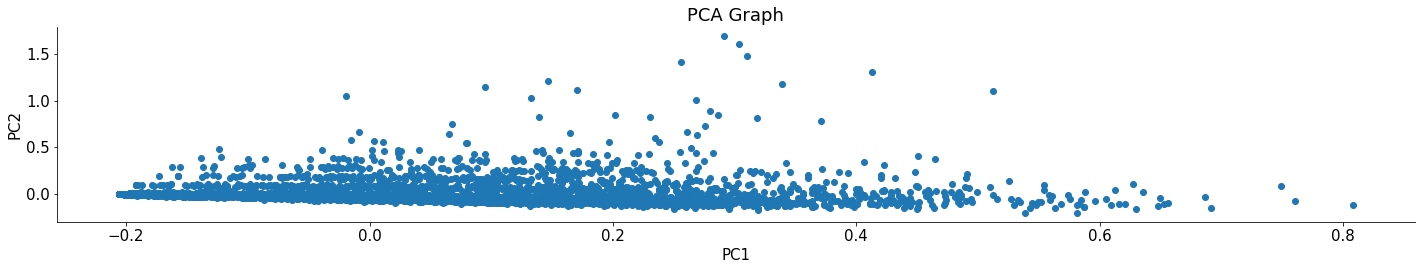

In [ ]:
import pandas as pd


labels = ['PC' + str(x) for x in range(1, 6)]
pca_df = pd.DataFrame(scores, columns = labels)

labels = ['PC' + str(x) for x in range(1, 6)]
plt.scatter(scores[: , 0] , scores[: , 1])
plt.title('PCA Graph')
plt.xlabel('PC1')
plt.ylabel('PC2')
 
#for sample in pca_df.index:
 #  plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
#c = plt.cm.jet(reaction_time)


plt.show()

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


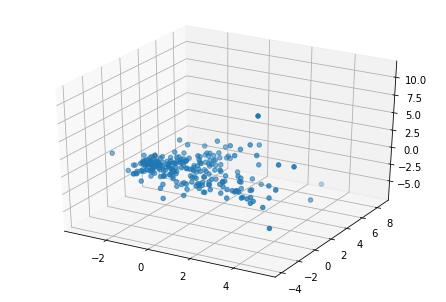

In [ ]:
#3D plotting of the first three principal components

from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random
fig = pyplot.figure()
ax = Axes3D(fig)

sequence_containing_x_vals = scores[ : , 0]
sequence_containing_y_vals = scores[ : , 1]
sequence_containing_z_vals = scores[ : , 2]


ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
pyplot.show()